In [1]:
import numpy as np
from matplotlib import pyplot as plt

import M8195A as awg
awg_ip = "192.168.0.208"

from sigproc_kit import *

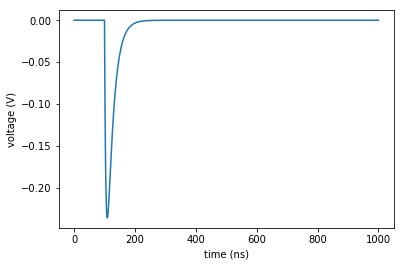

target ip : 192.168.0.208
connect to device ...
*IDN?
Keysight Technologies,M8195A,DE57700132,4.0.0.0-1
success!
NOTE: overriding sample rate to match desired period!
attempting to set sample rate : 64896000000.000000 Hz
success!
preparing data for channel 1
sending data ...
set output voltage ...
Output 1 on ...
RUN!
close socket


In [2]:
##################################################
##               detector signal                ##
##################################################


period = 1e-6

x=np.arange(0,period,0.1e-9)

#y=detector_signal_function(<time vector>, Q, tau1, tau1, delay)
y=detector_signal_function(x,-150e-12,5e-9,20e-9,100e-9)

plt.plot(x*1e9,y)
plt.xlabel("time (ns)")
plt.ylabel("voltage (V)")
plt.show()

awg.send_data(x,y,
              trace=1,
              ip=awg_ip,
              period=period)

In [5]:
##################################################
##               reference pulse                ##
##################################################

awg.pulser(
    trace=2,
    ip=awg_ip,
    on_val=300e-3,
    width=50e-9,
    leading_edge=2e-9,
    trailing_edge=2e-9,
    delay=0e-9,
    period=period
)

target ip : 192.168.0.208
connect to device ...
*IDN?
Keysight Technologies,M8195A,DE57700132,4.0.0.0-1
success!
NOTE: overriding sample rate to match desired period!
attempting to set sample rate : 64896000000.000000 Hz
success!
preparing data for channel 2
sending data ...
set output voltage ...
Output 2 on ...
RUN!
close socket
